# **Data Cleaning and Feature Engineering**

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [3]:
df = pd.read_excel('marketing_campaign.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Year_Birth นั้นเป็นตัวแปรที่ใช้งานและเข้าใจยากเราจึงจะเปลี่ยนเป็นอายุแทน (โดยอึงเวลาช่วงที่ชุดข้อมูลนี่ถูกอัปโหลดนั้นคือปี 2020)

In [5]:
df = df.rename(columns={'Year_Birth': 'Age'})
df['Age'] = 2020 - df['Age']
df.info()
print(df[['Age']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

รวม kidhome และ teenhome เป็น have_child แทนเพื่อความง่ายต่อการใช้งาน

In [6]:
df['have_child'] = ((df['Kidhome'] > 0) | (df['Teenhome'] > 0)).astype(int)
df = df.drop(columns=['Kidhome', 'Teenhome'])
df.info()
print(df[['have_child']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

ปรับ Marital_Status ให้เป็น Single กับ Couple แทนเพื่อความเข้าใจง่าย

In [7]:
df['Marital_Status'] = df['Marital_Status'].replace(['Divorced', 'Married', 'Together', 'Widow', 'Alone', 'Absurd', 'YOLO'], ['Single', 'Couple', 'Couple', 'Single', 'Single', 'Single', 'Single'])
df.info()
print(df[['Marital_Status']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

ผมรวมรายจ่ายทั้งหมด

In [8]:
df['Total_Money_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df.info()
print(df[['Total_Money_Spent']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Age                  2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Dt_Customer          2240 non-null   object 
 6   Recency              2240 non-null   int64  
 7   MntWines             2240 non-null   int64  
 8   MntFruits            2240 non-null   int64  
 9   MntMeatProducts      2240 non-null   int64  
 10  MntFishProducts      2240 non-null   int64  
 11  MntSweetProducts     2240 non-null   int64  
 12  MntGoldProds         2240 non-null   int64  
 13  NumDealsPurchases    2240 non-null   int64  
 14  NumWebPurchases      2240 non-null   int64  
 15  NumCatalogPurchases  2240 non-null   i

สร้าง Column แสดงอายุสมาชิกของลูกค้า

In [9]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Membership_Age'] = (pd.to_datetime('2021-01-01').year - df['Dt_Customer'].dt.year) * 12 + (pd.to_datetime('2021-01-01').month - df['Dt_Customer'].dt.month)
df.info()
print(df[['Dt_Customer', 'Membership_Age']].head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Age                  2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

สร้าง Education_Level โดยจัดเป็น High (PhD, Master, amd 2n Cycle) Middle (Graduate) Low (Basic) เพื่อให้เข้าใจง่ายขึ้น

In [10]:
def map_education(level):
    if level in ['PhD', 'Master','2n Cycle']:
        return 'High'
    elif level == 'Graduation':
        return 'Middle'
    else:
        return 'Low'

df['Education_Level'] = df['Education'].apply(map_education)
df.info()
print(df[['Education', 'Education_Level']].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Age                  2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Dt_Customer          2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

สร้าง Column Total_Campaign_accept เพื่อดูว่าลูกค้าคนนี้ตอบรับ Campaign ของเรากี่รอบแล้ว

In [11]:
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
df.info()
print(df['Total_Campaigns_Accepted'].head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2240 non-null   int64         
 1   Age                       2240 non-null   int64         
 2   Education                 2240 non-null   object        
 3   Marital_Status            2240 non-null   object        
 4   Income                    2216 non-null   float64       
 5   Dt_Customer               2240 non-null   datetime64[ns]
 6   Recency                   2240 non-null   int64         
 7   MntWines                  2240 non-null   int64         
 8   MntFruits                 2240 non-null   int64         
 9   MntMeatProducts           2240 non-null   int64         
 10  MntFishProducts           2240 non-null   int64         
 11  MntSweetProducts          2240 non-null   int64         
 12  MntGoldProds        

เช็คและลบค่า outlier

In [12]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
df = remove_outliers_iqr(df, 'Income')
df = remove_outliers_iqr(df, 'Total_Money_Spent')

เช็คหาค่า Null

In [13]:
df.isnull().sum()

,0
ID,0
Age,0
Education,0
Marital_Status,0
Income,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


จากข้อมูลทั้งหมด 2240 มีข้อมูลว่างทั้งหมด 24 ข้อมูลซึ่งเป็นจำนวนที่น้อย เราจึงตัดสินใจที่จะลบข้อมูลที่ว่างออก

In [14]:
df.dropna(inplace=True)
df.isnull().sum()

,0
ID,0
Age,0
Education,0
Marital_Status,0
Income,0
Dt_Customer,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0


In [15]:
df.to_excel('modified_marketing_campaign.xlsx', index=False)
files.download('modified_marketing_campaign.xlsx')

NameError: name 'files' is not defined

# **In-Depth Analysis**


**ตัวแปรใดส่งผลต่อยอดตอบรับแคมเปญมากที่สุด**

In [18]:
total_response = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
features = ['Age', 'Income', 'have_child', 'Membership_Age','NumDealsPurchases','NumStorePurchases','NumWebPurchases']
x = df[features]
y = total_response

In [19]:
reg = linear_model.LinearRegression()
reg.fit(df[features], total_response)

LinearRegression()

In [20]:
coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': reg.coef_
})

print(coefficients)

# R-squared
print("R² Score:", reg.score(x, y))

             Feature  Coefficient
0                Age    -0.005946
1             Income     0.000018
2         have_child    -0.374006
3     Membership_Age     0.011098
4  NumDealsPurchases     0.007801
5  NumStorePurchases    -0.060314
6    NumWebPurchases     0.029584
R² Score: 0.1925643850812374


ด้วย Multiple Linear Regression เราได้พบว่า


1.   ผู้สูงอายุตอบรับแคมเปญน้อยกว่านิดหน่อย
2.   รายได้มีผลน้อยมากต่อแคมเปญ
3.   คนที่มีลูกนั้นไม่ตอบรับแคมเปญเยอะ
4.   ผู้ที่เป็นสามชิกมานานจะตอบรับแคมเปญค่อนข้างดี
5.   ส่วนลดมีผลให้มีการตอบรับแคมเปญส่วนหนึ่ง
6.   คนที่ซื้อของที่ร้านค้าไม่ตอบรับแคมเปญของเราจำนวนหนึ่ง
7.   คนที่ซื้อของผ่านเว็บไซต์ตอบรับแคมเปญของเรา

**รายได้ส่งผลให้ซื้อเยอะขึ้นหรือไหม**

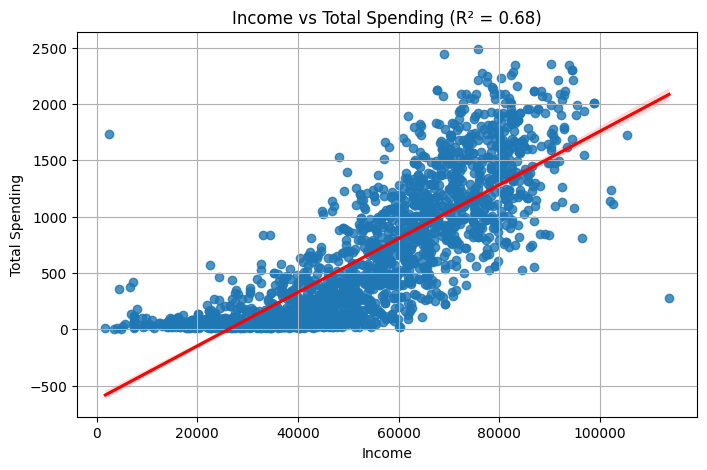

In [22]:
df1 = df[['Income', 'Total_Money_Spent']].dropna()
X = df1[['Income']]
y = df1['Total_Money_Spent']

# Linear Regression
model = linear_model.LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Plot
plt.figure(figsize=(8, 5))
sns.regplot(x='Income', y='Total_Money_Spent', data=df1, line_kws={'color': 'red'})
plt.title(f"Income vs Total Spending (R² = {r2:.2f})")
plt.xlabel("Income")
plt.ylabel("Total Spending")
plt.grid(True)
plt.show()

จากภาพจะเห็นได้ว่าลูกค้าที่มีรายได้มากนั้นจะมีการซื้อเยอะขึ้นตามไปด้วย

**อายุส่งผลต่อสิ้นค้าที่ซื้อหรือไหม**

In [23]:
spending_cols = [
    'MntWines', 'MntFruits', 'MntMeatProducts',
    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'
]

# Calculate correlation between Age and spending
correlations = df[['Age'] + spending_cols].corr()['Age'][1:].sort_values()

print("Correlation of Age with each product category:\n")
print(correlations)

Correlation of Age with each product category:

MntFruits           0.024136
MntSweetProducts    0.026680
MntFishProducts     0.042586
MntMeatProducts     0.049718
MntGoldProds        0.065241
MntWines            0.166435
Name: Age, dtype: float64


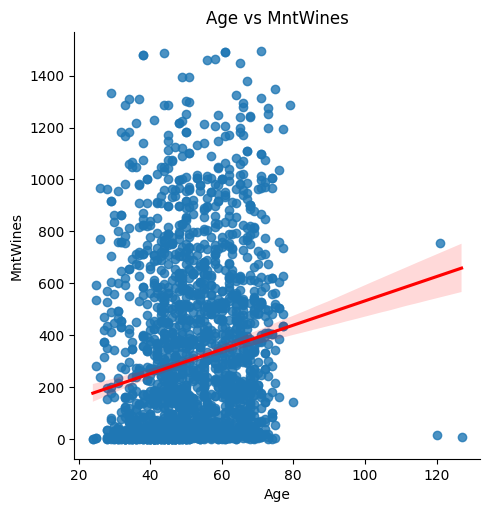

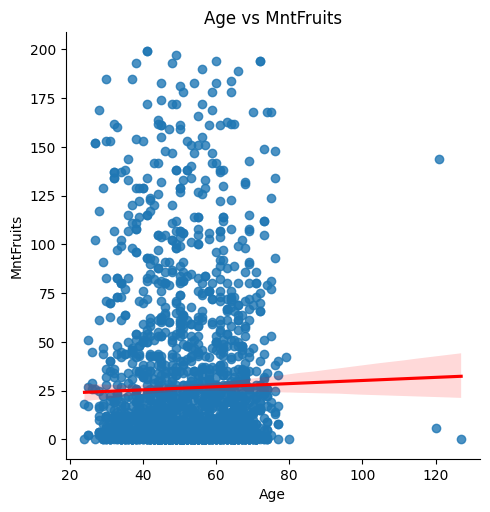

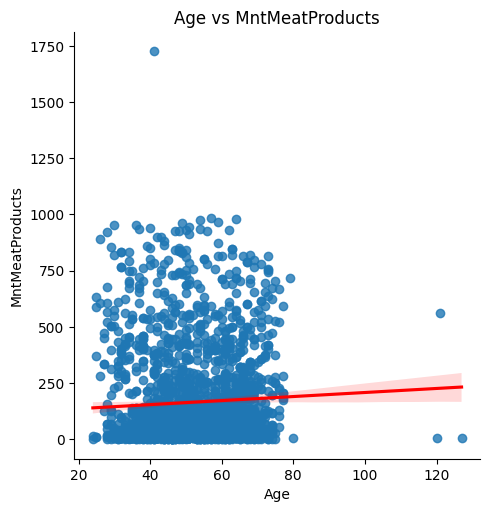

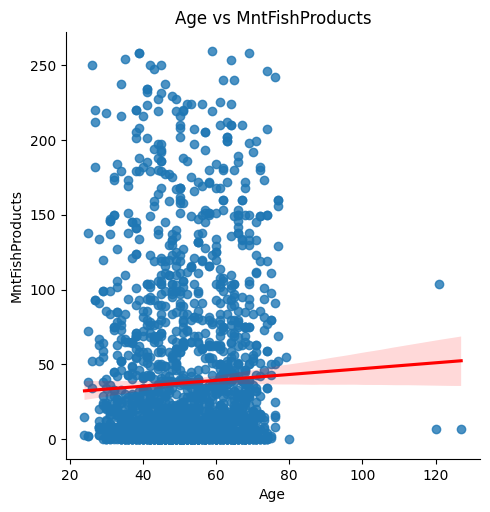

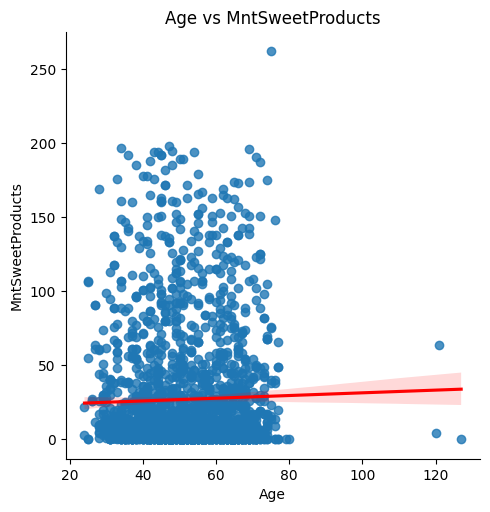

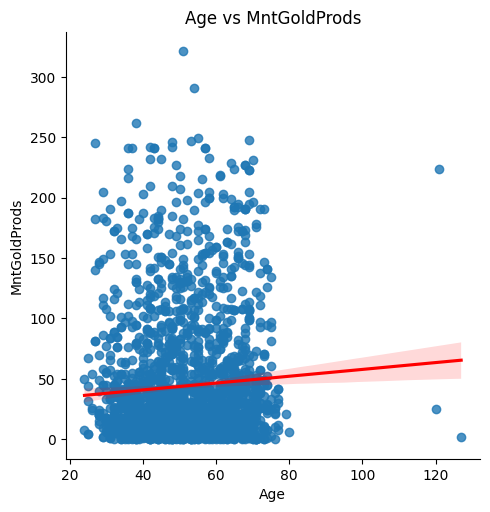

In [24]:
for col in spending_cols:
    sns.lmplot(data=df, x='Age', y=col, line_kws={'color': 'red'})
    plt.title(f'Age vs {col}')
    plt.show()

<ipython-input-28-d4a032b733f8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('Age_Group')[spending_cols].mean()


             MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Age_Group                                                            
21-30      305.203390  35.932203       269.864407        51.813559   
31-40      233.606742  26.514045       160.775281        37.191011   
41-50      259.452545  23.662999       140.044017        33.696011   
51-60      335.402390  26.296813       156.888446        35.021912   
61-70      354.635762  26.788079       178.501104        41.540839   
71-80      501.971429  35.323810       259.800000        55.000000   

           MntSweetProducts  MntGoldProds  
Age_Group                                  
21-30             31.745763     57.898305  
31-40             26.983146     39.103933  
41-50             25.386520     39.535076  
51-60             25.115538     45.926295  
61-70             28.311258     50.646799  
71-80             38.228571     46.133333  


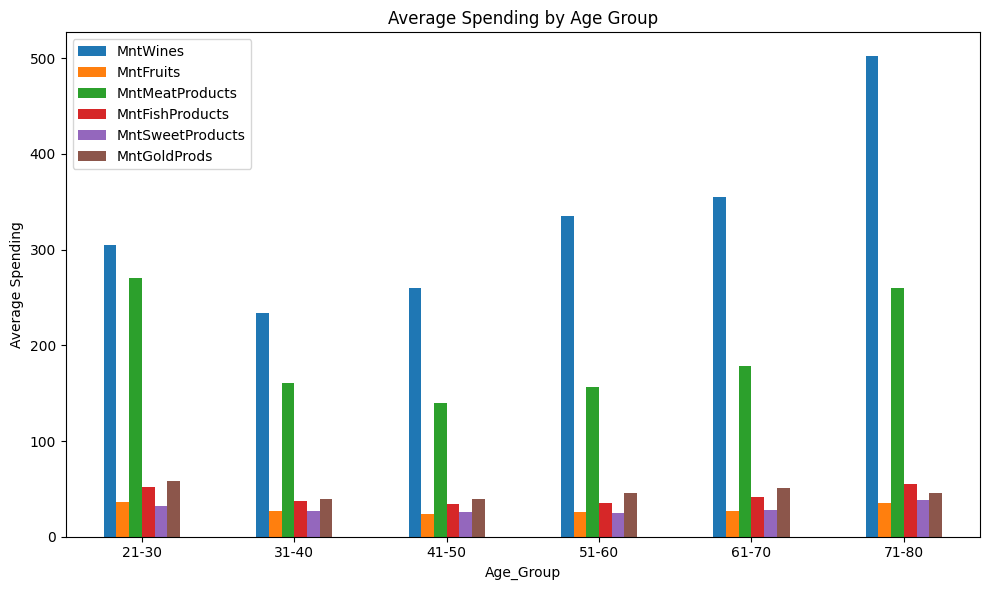

In [28]:
df['Age_Group'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['21-30', '31-40', '41-50', '51-60', '61-70', '71-80'])

# Average spending per age group
grouped = df.groupby('Age_Group')[spending_cols].mean()
print(grouped)

# Plot it
grouped.plot(kind='bar', figsize=(10, 6))
plt.title("Average Spending by Age Group")
plt.ylabel("Average Spending")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

จากภาพจะเห็นได้ว่าผู้สูงอายุนั้นจะมีการซื้อไวน์เพื่มขึ้นเมื่อเทียบกับกลุ่มอายุอื่นๆ
ส่วนกลุ่มอายุ 18-30 จะมีการซื้อ เนื้อ และ ทองมากกว่ากลุ่มอายุอื่นๆ

# **Insights & Recommendations**

 **Insight**


1.   ผู้ที่มีรายได้สูงนั้นมีการซื้อสินค้าที่มากขึ้นตาม นั้นหมายความว่ากำลังการซื้อสินค้าของเรานั้นผันแปรโดยตรงกับรายได้ของลูกค้า
2.   ผู้สูงอายุซื้อไวน์มากกว่า อาจเกิดจากการที่ผู้สูงอายุนั้นมีต่อมรับรสเปลี่ยนไป ทำให้ผู้สูงอายุชอยไวน์มากขึ้น
3.   กลุ่มคนวัย 21-30 ซื้อเนื้อและทองมากว่ากลุ่มอายุอื่นๆ อาจเนื่องมาจากวัยนี้เป็นวัยที่ต้องเข้าสังคมมากกว่าวัยอื่น และเนื้อเป็นอาหารที่คนกินกันโดยทั่วไป ส่วนผลิตภัณท์ทองนั้นใช้แสดงถึงความมั่นคงทางการเงิน
4.   ผู้ที่มีลูกนั้นมีแนวโน้มที่จะตอบรับแคมเปญน้อยมาก อาจเป็นเพราะผู้ที่มีลูกนั้นจำเป็นต้องไตร่ตรองการใช้เงินเป็นอย่างดีเพราะมีลูกที่ต้องดูแล


**Recommendations**



1.   ทำการตลาดกับกลุ่มลูกค้าที่มีรายได้สูง เพราะการกำลังในการซื้อของลูกค้าผันแปรโดยตรงกับรายได้
2.   การขายไวน์ให้ทำโดยทำการตลาดกับผู้อายุเริ่มสูงขึ้น
3.   ทำการตลาดขายของ Luxury good ให้กับกลุ่มคนวัย 18-30 และขายเนื้อเป็นชุดในราคาที่ถูกลงเพื่อเพิ่มอัตราการซื้อทองในขณะที่ลูกค้ายังสามารถซื้อเนื้อได้
4.   ลดแคมเปญที่จะจัดทำให้กับกลุ่มลูกค้าที่มีลูกแล้วเพราะมีโอกาศสูงที่เขาจะไม่ตอบรับ
5.   ลดการทำแคมเปญแบบหน้าร้านแล้วเพิ่มการทำแคมเปญแบบออนไลน์เพราะปัจจุบัน อนนไลน์นั้นสะดวกกว่าหน้าร้านรวมกับค่าดูแลร้านนั้นแบบออนไลน์ดูแลง่ายกว่า
6.   สร้างแคมเปญให้สำหรับลูกค้าที่เป็นสมาชิกนานเพื่อคงความภักดีต่อร้านค้าให้กับลูกค้าที่เป็นสมาชิกมานาน


